<a href="https://colab.research.google.com/github/Group4-s2025/DATA6550-Bias/blob/main/Module_2_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Bias in Datasets
## Module 2: Data Bias
### By: Savi Alwis, Moses Kipkemboi, Muqtasid Qureshi, Pallavi Suram

In [ ]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/Group4-s2025/DATA6550-Bias/refs/heads/main/data/heart_attack_prediction_dataset.csv"
df = pd.read_csv(url)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# Sampling Bias: Gender Distribution

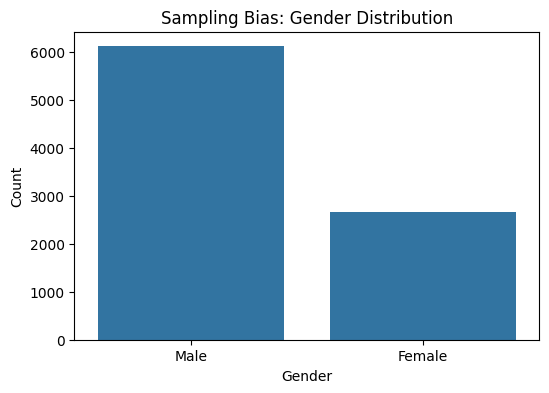

Gender Distribution:
 Sex
Male      69.736392
Female    30.263608
Name: proportion, dtype: float64


In [ ]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Sex")
plt.title("Sampling Bias: Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Print percentage distribution
gender_counts = df["Sex"].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_counts)


### Explanation
If we train a predictive model using this dataset, the model may learn to predict patterns that are more reflective of male patients, considering they make up 70% of the data.
This means that the model could be inaccurate when predicting heart attack risk for female patients since there are less examples for the model to learn from.

# Selection Bias: Income

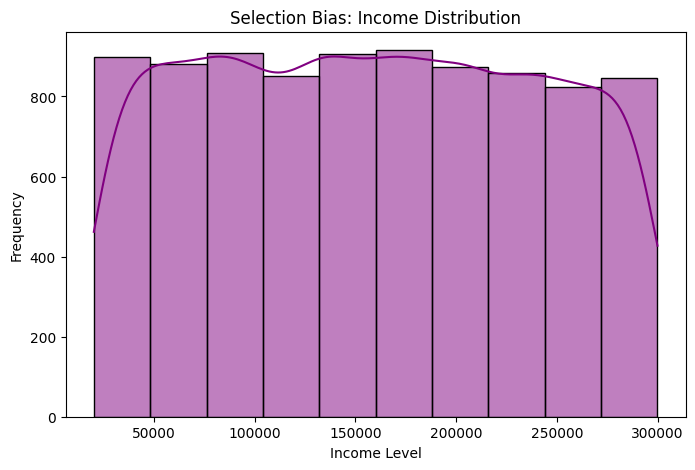

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["Income"], bins=10, kde=True, color="purple")
plt.title("Selection Bias: Income Distribution")
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.show()


### Explanation



# Historical Bias: Heart Attack Risk by Gender

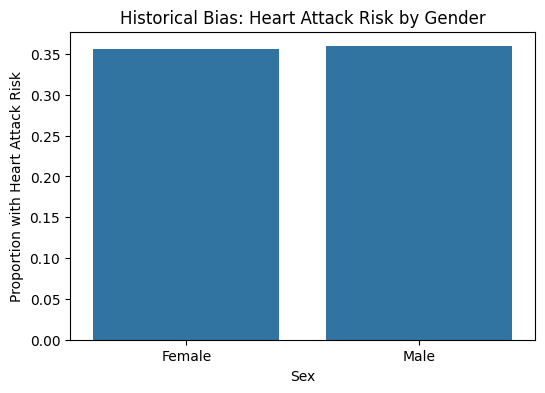

In [ ]:
# Group by gender and calculate heart attack risk proportions
gender_heart_risk = df.groupby("Sex")["Heart Attack Risk"].mean()

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=gender_heart_risk.index, y=gender_heart_risk.values)
plt.title("Historical Bias: Heart Attack Risk by Gender")
plt.ylabel("Proportion with Heart Attack Risk")
plt.show()


### Explanation

# Geographic Bias: Continent & Country Distribution

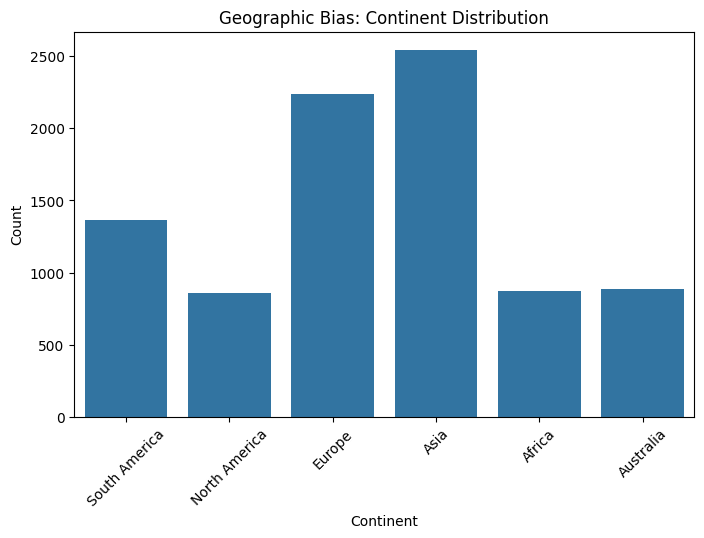

In [ ]:
# Continent Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Continent")
plt.title("Geographic Bias: Continent Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

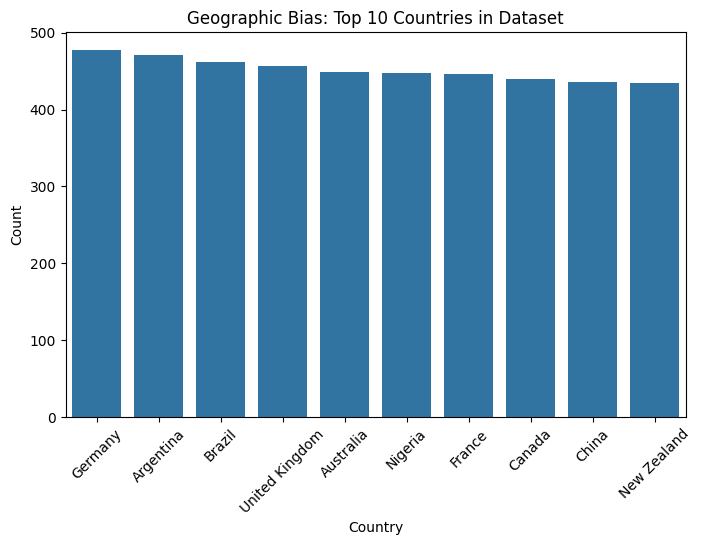

In [ ]:
# Top 10 countries
top_countries = df["Country"].value_counts().nlargest(10)

# Bar plot for top countries
plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Geographic Bias: Top 10 Countries in Dataset")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()